<h1> Logistic Regression Model </h1>

<h3> Importing the required libraries: </h3> <br>
   numpy - For large multi-dimensional arrays and complex mathematical functions to be performed on the arrays </br>
   <br> pandas - For data manipulation and data analysis </br>
   <br> matplotlib - For data visualization </br>
    <br> sklearn - For regression, classfication and clustering algorithms </br>
    <br> os - Using Operating System dependent functionality </br> 

In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn
import os
from IPython.display import Image

<h3> Change the working directory path <h3>

In [5]:
os.chdir('C:\Aviroop\Analytics\Hands on Machine Learning A-Z\Logistic_Regression')

<h3> Importing dataset </h3>

In [6]:
SocialNetworkAdsData = pd.read_csv('Social_Network_Ads.csv')

<h3> View few rows of the dataset </h3>

In [7]:
SocialNetworkAdsData.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<h3> Load data into Numpy Arrays Dependent Variable y and Independent variable X </h3>

In [8]:
X = SocialNetworkAdsData.iloc[:,[2,3]].values
y = SocialNetworkAdsData.iloc[:,4].values

<h3> Split into Train and Test sets </h3>
<br>This is done to train the Machine Learning algorithm on the Training dataset, and the test set is used to verify the accuracy of the Machine Learning algorithm. </br>

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<h3> Feature Scaling </h3>
<br>  This means that we are converting the data into a normalized form such that every feature has comparable values despite their original values might being extremely large. Also, the change in values in a variable having values of high magnitude, won't affect the dependent variable significantly. </br>

In [10]:
from sklearn.preprocessing import StandardScaler
StdScaler_X = StandardScaler()
X_train = StdScaler_X.fit_transform(X_train)
X_test = StdScaler_X.transform(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


<h3> Fitting the Logistic Regression Model </h3>
<br> Logistic Regression function is a logarithmic function which acts as a classifier between data points. The dependent variable is dichotomous, i.e. could have 2 discrete values. (E.g. - Yes/No, 1/0,..) </br>
<h3> Logistic Regression function </h3>

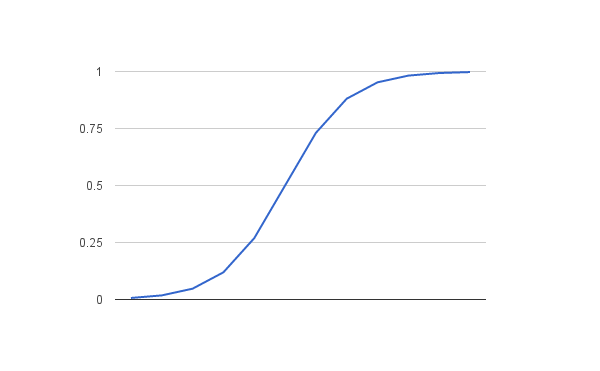

In [11]:
Image(filename = 'Logistic-Function.png', width = 500, height = 500)

In [12]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<h3> Predict using Logistic Regression Model </h3>

In [13]:
y_predicted = classifier.predict(X_test)

<h3> Confusion Matrix </h3>
<br> Confusion matrix is a table layout to evaluate the accuracy of a machine learning classification model. It would have the predicted outcomes as the row headers, and actual Test outcomes as the column headers or vice versa. When the predicted outcome turns out to be <i>same</i> as the actual outcome, it is coined as "<b>True</b> Positive" or "<b>True</b> Negative". If the predicted outcome is not similar to the actual outcome, then it is coined as "<b>False</b> Positive" or "<b>False</b> Negative".
<br><b> True Positive</b>: The Predicted outcome is positive, actual outcome is also positive.
<br><b>True Negative</b>: The Predicted outcome is negative, actual outcome is also negative.
<br><b>False Positive</b>: The Predicted outcome is positive, the actual outcome is negative. <i> Type I error </i>
<br><b>False Negative</b>: The Predicted outcome is negative, the actual outcome is positive.<i> Type II error </i></br>


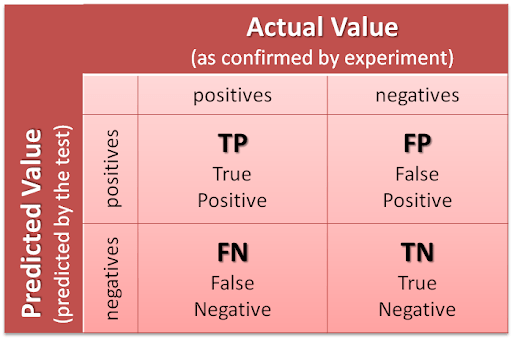

In [14]:
Image(filename = "C:\Aviroop\Analytics\Hands on Machine Learning A-Z\Pictures\Confusion Matrix.png", width = 300, height = 300)

Source: <a href = "http://lh3.ggpht.com/_qIDcOEX659I/SzjW6wGbmyI/AAAAAAAAAtY/Nls9tSN6DgU/contingency_thumb%5B3%5D.png?imgmax=800">Codeproject.com</a>

In [39]:
from sklearn.metrics import confusion_matrix
Conf_matrix = confusion_matrix(y_predicted, y_test)

<h3> Accuracy = sumdiag/totalsum </h3>

<h3> Calculating sum of diagonal values in the confusion matrix </h3>

In [38]:
sumdiag = 0
for i in range(Conf_matrix.shape[0]):
    for j in range(Conf_matrix.shape[1]):
        if (i == j):
            sumdiag = sumdiag + Conf_matrix[i][j]    
        
sumdiag

73

<h3> Calculating the total sum of all the values in the confusion matrix </h3>

In [41]:
totalsum = 0
for i in range(0, Conf_matrix.shape[0]):
    for j in range(0, Conf_matrix.shape[1]):
        totalsum = totalsum + Conf_matrix[i][j]


totalsum

80

<h3> Calculating Accuracy </h3>

In [42]:
accuracy = sumdiag/totalsum
accuracy

0.91249999999999998